In [3]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Context

In [4]:
eda_data = pd.read_csv('train.csv', index_col="PassengerId")
eda_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Data quality assessment

In [5]:
eda_data.info()   # информация об имеющихся данных
eda_data.isnull().sum() # для удобства выведем количество пустых ячеек в каждом столбце

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

In [6]:
## Удалим столбцы с большим количеством пропусков и не содержащие ценной для наших исследований информации
useless_columns = ['Name', 'Ticket', 'Cabin']
train = eda_data.drop(columns = useless_columns)

In [7]:
# inputting - заполнение пропущенных значений

def impute_data(df):
    df_copy = df.copy() # копируем, чтобы не изменять оригинал
    
    # заполняем пропущенные данные для категориальных переменных
    categorical_vars = list(df_copy.select_dtypes(include=['object']).columns.values)
    for col in categorical_vars:# можно рассмореть только столбец 'Embarked', так как других столбцов с пропущенными категориальными переменными нет
        if (df_copy[col].isnull().values.any()):
            df_copy[col].fillna('unknown', inplace = True)# заполняем пропущенные данные "unknown", чтобы не увеличивать ни одно из значений категориальной переменной и не искажать статистику
            
    
    # заполняем пропущенные данные для количественных переменных
    numerical_vars = list(df_copy.select_dtypes(include=['int64', 'float64']).columns.values)
    for col in numerical_vars:
        if (df_copy[col].isnull().values.any()):
            df_copy[col].fillna(df_copy[col].median(), inplace = True) # заполняем пропуски медианой
    
    
    return df_copy

train_full = impute_data(train)

## outliers in fare - исследуем выбросы в цене по каждому классу и удалим

Survived    2087
Pclass      2087
Sex         2087
Age         2087
SibSp       2087
Parch       2087
Fare        2087
Embarked    2087
dtype: int64

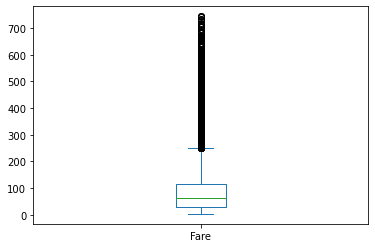

In [8]:
# первый класс
train_gr_class1 = train_full[train_full['Pclass'] == 1]
bp1 = train_gr_class1.Fare.plot.box(return_type='both')
outliers = [flier.get_ydata() for flier in bp1[1]['fliers']][0]
train_gr_class1[train_gr_class1.Fare.isin(outliers)].count()

In [9]:
# удаляем выбросы из первого класса
lower_bound = train_gr_class1.Fare.quantile(q=0.025)
upper_bound = train_gr_class1.Fare.quantile(q=0.975)
train_clear1 = train_gr_class1[(train_gr_class1.Fare > lower_bound) & (train_gr_class1.Fare < upper_bound)]

Survived    1811
Pclass      1811
Sex         1811
Age         1811
SibSp       1811
Parch       1811
Fare        1811
Embarked    1811
dtype: int64

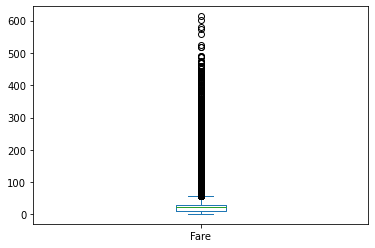

In [10]:
# второй класс
train_gr_class2 = train_full[train_full['Pclass'] == 2]
bp2 = train_gr_class2.Fare.plot.box(return_type='both')
outliers = [flier.get_ydata() for flier in bp2[1]['fliers']][0]
train_gr_class2[train_gr_class2.Fare.isin(outliers)].count()

In [11]:
# удаляем выбросы из второго класса
lower_bound = train_gr_class2.Fare.quantile(q=0.025)
upper_bound = train_gr_class2.Fare.quantile(q=0.975)
train_clear2 = train_gr_class2[(train_gr_class2.Fare > lower_bound) & (train_gr_class2.Fare < upper_bound)]

Survived    2762
Pclass      2762
Sex         2762
Age         2762
SibSp       2762
Parch       2762
Fare        2762
Embarked    2762
dtype: int64

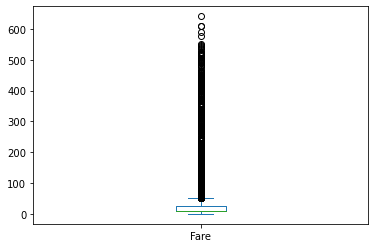

In [12]:
# третий класс
train_gr_class3 = train_full[train_full['Pclass'] == 3]
bp3 = train_gr_class3.Fare.plot.box(return_type='both')
outliers = [flier.get_ydata() for flier in bp3[1]['fliers']][0]
train_gr_class3[train_gr_class3.Fare.isin(outliers)].count()

In [13]:
# удаляем выбросы из третьего класса
lower_bound = train_gr_class3.Fare.quantile(q=0.025)
upper_bound = train_gr_class3.Fare.quantile(q=0.975)
train_clear3 = train_gr_class3[(train_gr_class3.Fare > lower_bound) & (train_gr_class3.Fare < upper_bound)]

In [14]:
# новый DataFrame 
train_full = pd.concat([train_clear1, train_clear2, train_clear3], axis=0)
train_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94995 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  94995 non-null  int64  
 1   Pclass    94995 non-null  int64  
 2   Sex       94995 non-null  object 
 3   Age       94995 non-null  float64
 4   SibSp     94995 non-null  int64  
 5   Parch     94995 non-null  int64  
 6   Fare      94995 non-null  float64
 7   Embarked  94995 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 6.5+ MB


In [32]:
# проверим столбец 'Survived'  на корректность данных
set(train_full['Survived'].values)

{0, 1}

In [33]:
# проверим столбец 'Pclass' на корректность данных
set(train_full['Pclass'].values)

{1, 2, 3}

In [34]:
# проверим столбец 'Sex' на корректность данных
set(train_full['Sex'].values)

{'female', 'male'}

In [39]:
# проверим столбец 'Age' на корректность данных
min_age = train_full['Age'].min()
max_age = train_full['Age'].max()
print(f' самый молодой пассажир {min_age} лет \
\n самый большой возраст среди пассажиров {max_age}')

 самый молодой пассажир 0.08 лет 
 самый большой возраст среди пассажиров 87.0


In [40]:
# проверим столбец 'SibSp' на корректность данных
set(train_full['SibSp'].values)

{0, 1, 2, 3, 4, 5, 8}

In [41]:
# проверим столбец 'Parch' на корректность данных
set(train_full['Parch'].values)

{0, 1, 2, 3, 4, 5, 6, 9}

# Data exploration

In [46]:
train_full[train_full['Survived'] == 1].shape[0]

40772

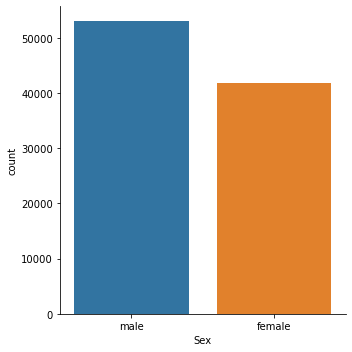

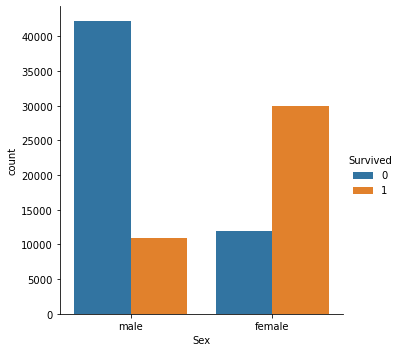

In [17]:
sns.catplot(x='Sex', data = train_full, kind = 'count')
sns.catplot(x ='Sex', data = train_full, hue = 'Survived', kind = 'count')
#plt.show()

<AxesSubplot:xlabel='count', ylabel='Pclass'>

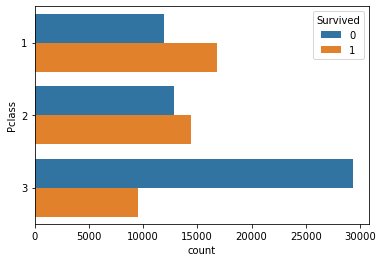

In [18]:
sns.countplot(y='Pclass', hue = 'Survived', data = train_full)

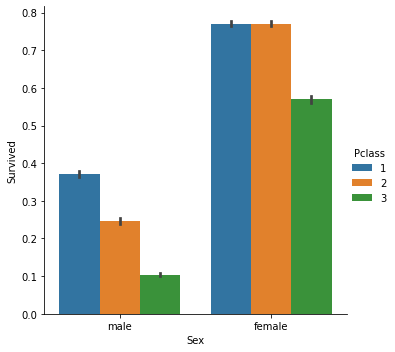

In [19]:
sns.catplot(kind="bar", x="Sex", y="Survived", hue="Pclass", data=train_full)

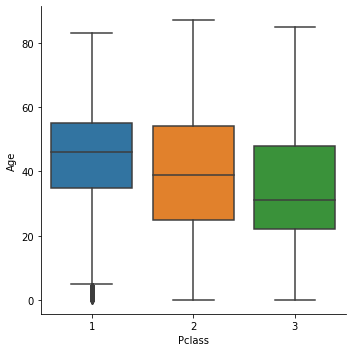

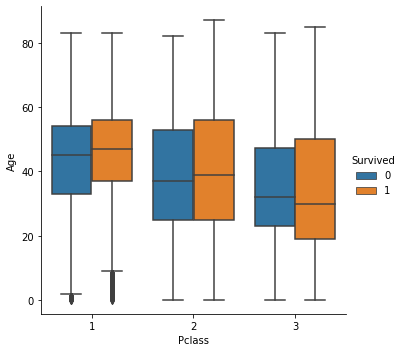

In [20]:
sns.catplot(x="Pclass",y="Age",kind='box', data=train_full)
sns.catplot(x="Pclass",y="Age",kind='box', hue="Survived", data=train_full)

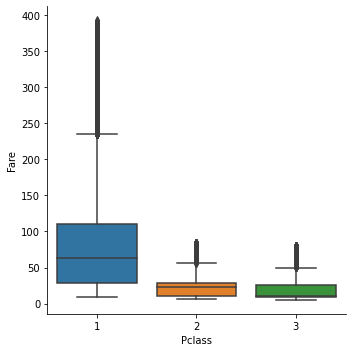

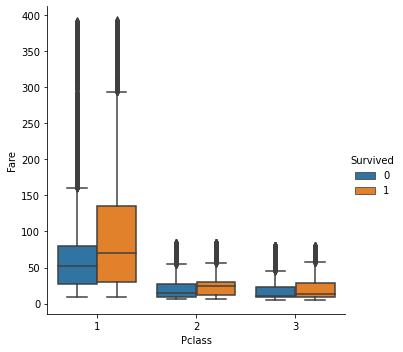

In [21]:
sns.catplot(x="Pclass",y="Fare",kind='box', data=train_full)
sns.catplot(x="Pclass",y="Fare",kind='box', hue="Survived", data=train_full)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

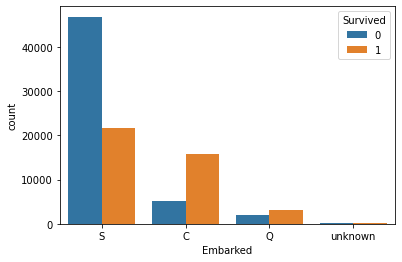

In [22]:
sns.countplot(x='Embarked', hue = 'Survived', data = train_full)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

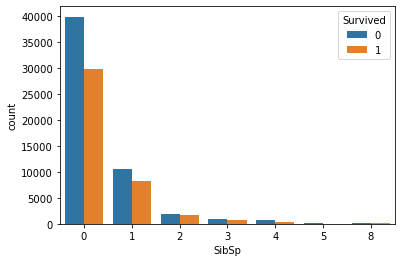

In [23]:
sns.countplot(x='SibSp', hue = 'Survived', data = train_full)

<AxesSubplot:xlabel='Parch', ylabel='count'>

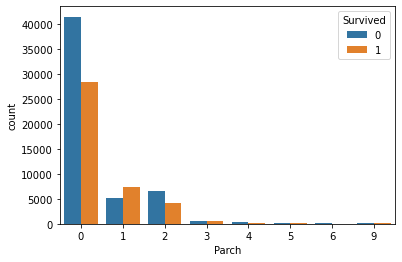

In [24]:
sns.countplot(x='Parch', hue = 'Survived', data = train_full)

 средний возраст пассажиров 38.412925206589804 
 медиана возраста 39.0
 среднеквадратичное отклонение 18.001754980603017


<AxesSubplot:xlabel='Age', ylabel='Count'>

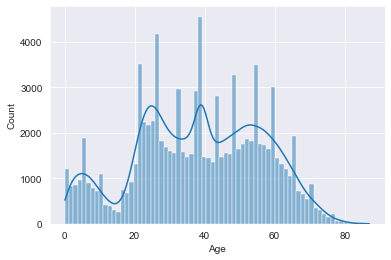

In [37]:
#найдём меры центральной тенденции и изобразим респределение даных возраста
mean_age = train_full['Age'].mean()
median_age = train_full['Age'].median()
std_age = train_full['Age'].std()
print(f' средний возраст пассажиров {mean_age} \
\n медиана возраста {median_age}\
\n среднеквадратичное отклонение {std_age}')
sns.histplot(train_full['Age'], kde = True)

 средняя цена билетов 38.93584157060903 
 самая низкая цена билета 5.17 
 самая высокая цена билета 392.95
 медиана цены билета 24.46
 среднеквадратичное отклонение цены 52.71655469884346


<AxesSubplot:xlabel='Fare', ylabel='Count'>

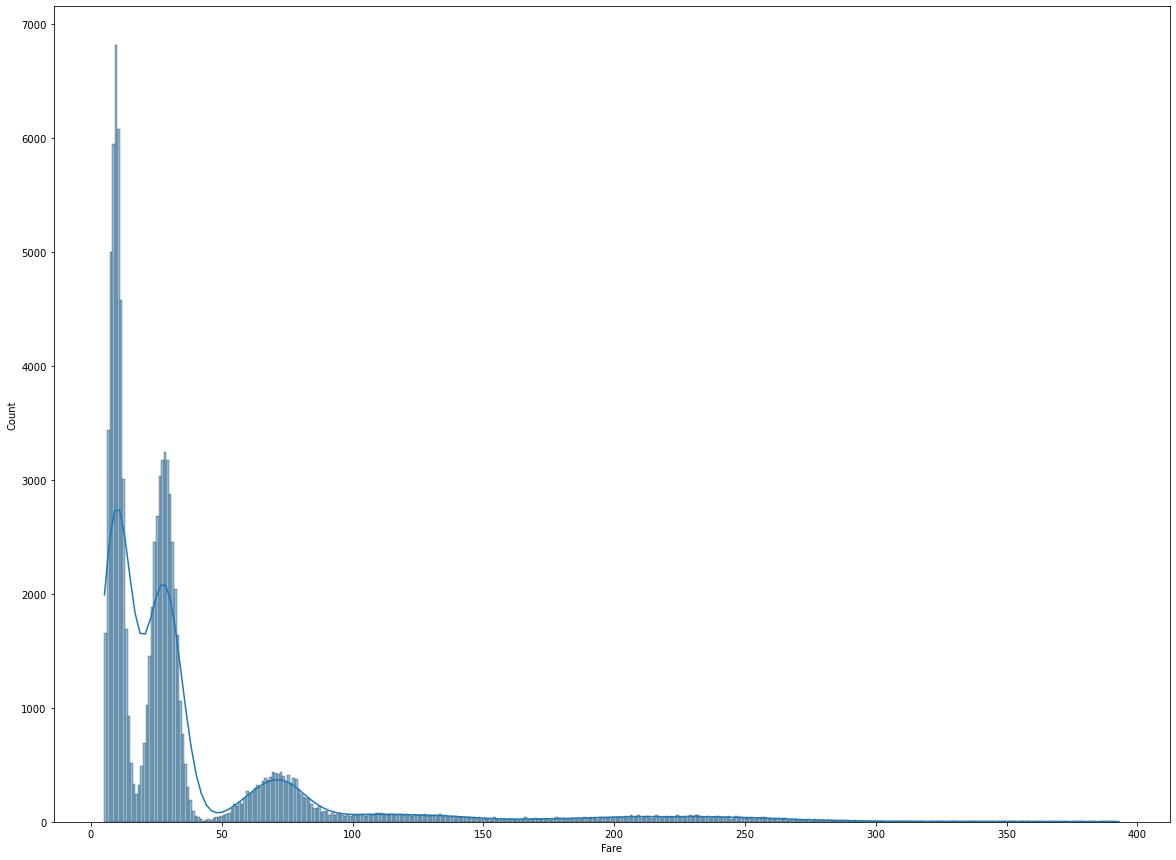

In [26]:
# найдём меры центральной тенденции и изобразим распределение данных цены
mean_fare = train_full['Fare'].mean()
max_fare = train_full['Fare'].max()
min_fare = train_full['Fare'].min()
median_fare = train_full['Fare'].median()
std_fare = train_full['Fare'].std()
print(f' средняя цена билетов {mean_fare} \n самая низкая цена билета {min_fare} \
\n самая высокая цена билета {max_fare}\
\n медиана цены билета {median_fare}\
\n среднеквадратичное отклонение цены {std_fare}')
plt.figure(figsize=(20,15))
sns.histplot(train_full['Fare'], kde = True)

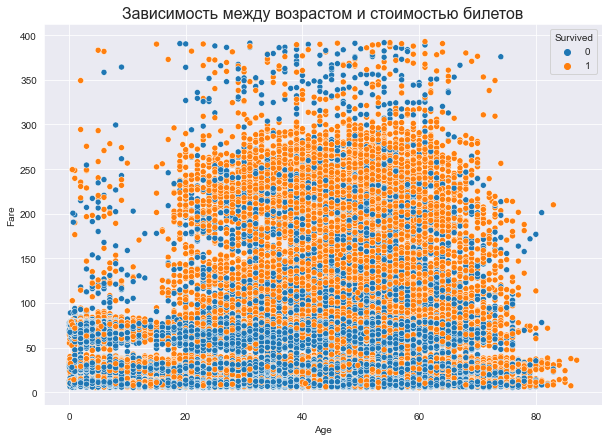

In [27]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
plt.title('Зависимость между возрастом и стоимостью билетов',size=16)
sns.scatterplot(x=train_full['Age'], y=train_full['Fare'], hue =train_full['Survived'])
plt.show()

# Summary